## ***#--> Mohamed Ibrahim Hussein***
## ***#--> 2305026***

***# Loading Necessary Libraries:***

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

***# Loading MNIST DataSet:***

In [32]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

***# Splitting Data Into Training & Testing Samples:***

In [33]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

In [34]:
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

In [35]:
print(f'Training samples: {len(mnist_trainset)}')
print(f'Test samples: {len(mnist_testset)}')

Training samples: 60000
Test samples: 10000


***# Defining The Neural Network:***

In [36]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [63]:
model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [38]:
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [55]:
epochs = 10
train_losses = []
train_accuracies = []

In [61]:
model.train()

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

***# Evaluating On The Test Sample:***

In [64]:
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

Epoch 1/10, Loss: 0.2901, Accuracy: 90.81%
Epoch 2/10, Loss: 0.1527, Accuracy: 95.32%
Epoch 3/10, Loss: 0.1210, Accuracy: 96.27%
Epoch 4/10, Loss: 0.1075, Accuracy: 96.70%
Epoch 5/10, Loss: 0.0958, Accuracy: 97.12%
Epoch 6/10, Loss: 0.0869, Accuracy: 97.31%
Epoch 7/10, Loss: 0.0832, Accuracy: 97.44%
Epoch 8/10, Loss: 0.0778, Accuracy: 97.68%
Epoch 9/10, Loss: 0.0707, Accuracy: 97.86%
Epoch 10/10, Loss: 0.0706, Accuracy: 97.89%


***# Plotting Training Loss & Accuracy:***

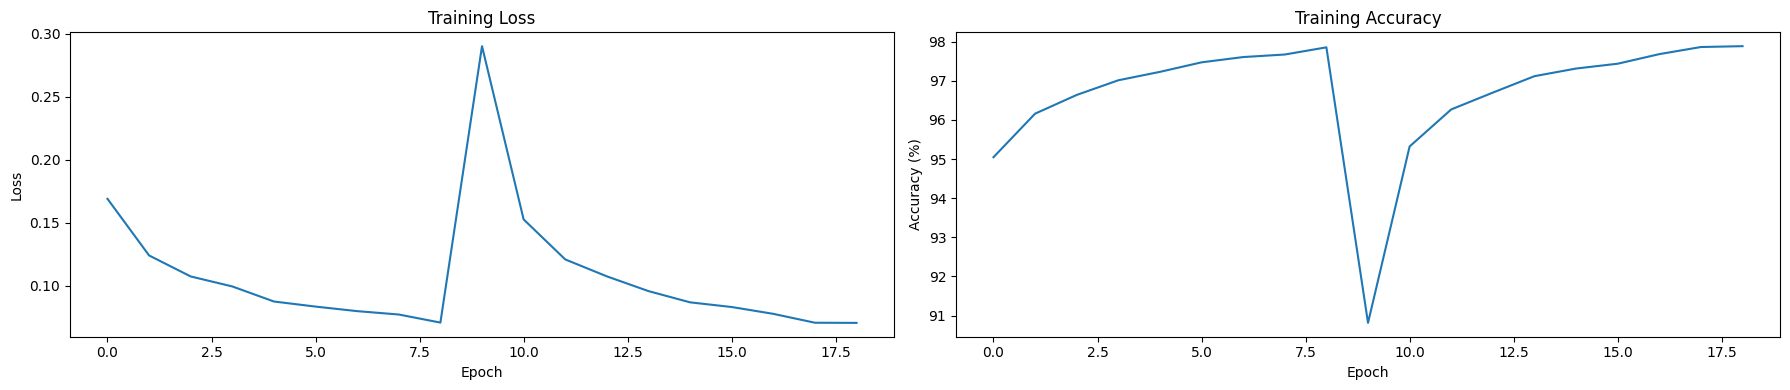

In [88]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.savefig('Training_Plots.Png')
plt.show()

***# Evaluating On Test Sample:***

In [66]:
model.eval()

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

In [69]:
test_loss = 0
correct = 0
total = 0
all_preds, all_targets = [], []

In [70]:
for data, target in test_loader:
    output = model(data)
    test_loss += criterion(output, target).item()
    pred = output.argmax(dim=1)
    correct += (pred == target).sum().item()
    total += target.size(0)
    all_preds.extend(pred.numpy())
    all_targets.extend(target.numpy())

In [71]:
test_loss /= len(test_loader)
test_accuracy = 100. * correct / total

In [72]:
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')
print(f'Final Training Accuracy: {train_accuracies[-1]:.2f}%')
print(f'Final Test Accuracy: {test_accuracy:.2f}%')

Test Loss: 0.1319, Test Accuracy: 97.05%
Final Training Accuracy: 97.89%
Final Test Accuracy: 97.05%


***# Confusion Matrix:***

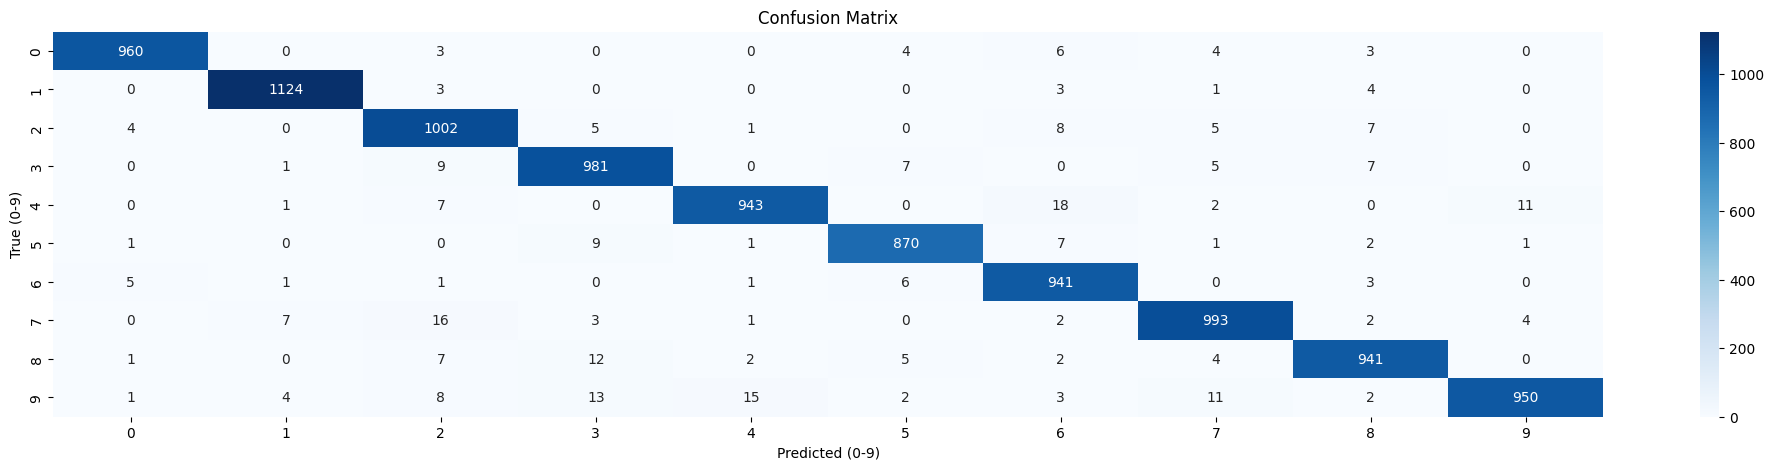

In [85]:
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(25, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted (0-9)')
plt.ylabel('True (0-9)')
plt.savefig('confusion_matrix.png')
plt.show()

In [77]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

In [78]:
outputs = model(images)
_, predicted = torch.max(outputs, 1)

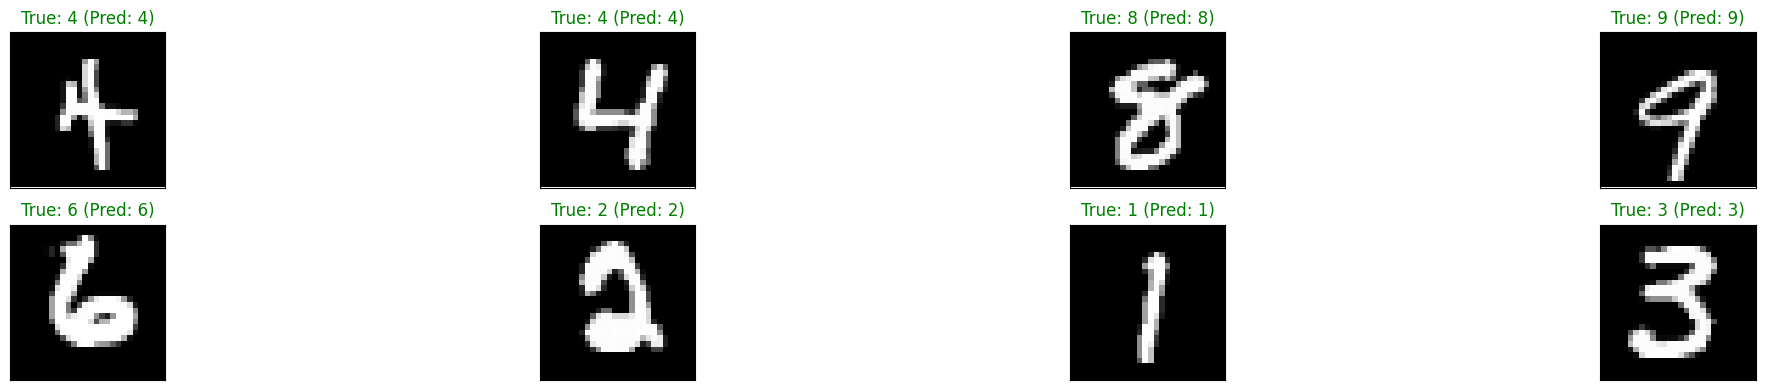

In [82]:
fig = plt.figure(figsize=(24, 4))
for idx in range(8):
    ax = fig.add_subplot(2, 4, idx+1, xticks=[], yticks=[])
    img = images[idx].view(28, 28)
    plt.imshow(img, cmap='gray')
    ax.set_title(f'True: {labels[idx].item()} (Pred: {predicted[idx].item()})', color='green' if predicted[idx].item() == labels[idx].item() else 'red')
plt.tight_layout()
plt.savefig('example_predictions.png')
plt.show()